# PETE 689: Petroleum Data Analytics and Machine Learning

# Final Project: Prediction of Well Deliverables and Economic Metrics Using Well Completions Data

## Notebook 2: Deployment of Developed Data-Driven Models on New Completion Dataset

## Team Members:

## Ivan Aldana

## Khaled Aldhayee

# Required Python Packages

In [1]:
# Basic Packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Pre-Processing Packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import f_regression, mutual_info_regression

# Cross-validation Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Machine Learning Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

# Evaluation Packages
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Models Importing Package
import pickle 

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Data Diagnostics

## 1.1. Descriptive Statistics of the Data

In [2]:
# Importing New Completion Dataset
# Columns order should be preserved as in the original data in Notebook 1
df = pd.read_excel('well_data.xlsx', sheet_name = 'New Data')
df = df[['LL MULTI','SAND CONC MODEL','LATERAL SPACING (M)','AREA (AC)','TVD(M)','LATERAL LENGTH (M)','STAGES','PERF CLUSTERS','SAND INTENSITY(KG.M3)','FLUID INTENSITY (M3/M)','INJ. RATE','PERM','PAY THICKNESS','FRACTURE 1/2 LENGTH','FRACTURE CONDUCTIVITY']]
df

,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),INJ. RATE,PERM,PAY THICKNESS,FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY
0,1.000,4,300,448.6,2956.900756,6000,116,116,4000.0,16.0,18,177,42,186.035360,374.709020
1,1.000,2,400,596.9,2956.900756,6000,155,155,1000.0,12.1,18,177,42,160.644820,91.252428
2,0.889,3,536,297.3,2956.900756,2200,25,50,3409.1,34.1,18,177,42,191.950810,100.863980
3,1.000,4,536,336.2,2956.900756,2500,33,66,1000.0,4.0,18,177,42,87.947493,271.392040
4,1.000,3,200,200.2,2956.900756,4000,39,78,1000.0,10.0,18,177,42,136.465460,91.527437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.889,2,300,269.5,2956.900756,3600,104,104,1111.1,13.5,18,177,42,160.547640,90.931921
639,1.000,4,400,598.2,2956.900756,6000,116,116,2000.0,8.0,18,177,42,148.844950,352.533350
640,1.000,4,400,448.6,2956.900756,4500,58,116,3000.0,12.0,18,177,42,128.307620,302.421920
641,0.889,2,200,154.9,2956.900756,3100,91,91,4516.1,26.5,18,177,42,193.497040,214.074320


In [3]:
# Showing the descriptive statistics of Completion Dataset
df.describe()

,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),INJ. RATE,PERM,PAY THICKNESS,FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY
count,643.000000,643.000000,643.000000,643.000000,6.430000e+02,643.000000,643.000000,643.000000,643.000000,643.000000,643.0,643.0,643.000000,643.000000,643.000000
mean,0.944586,2.959565,363.129082,345.307621,2.956901e+03,3804.852255,68.942457,90.878694,2522.938970,17.333530,18.0,177.0,41.925350,159.967530,199.218415
std,0.055543,0.854663,125.658244,162.139962,2.639588e-11,1140.534703,32.230741,28.226292,1197.882363,10.660535,0.0,0.0,0.944254,36.922247,97.118585
min,0.889000,0.000000,200.000000,110.400000,2.956901e+03,2200.000000,25.000000,49.000000,1000.000000,4.000000,18.0,177.0,30.000000,87.609094,88.630919
25%,0.889000,2.000000,300.000000,220.800000,2.956901e+03,3100.000000,46.000000,68.000000,1132.100000,9.800000,18.0,177.0,42.000000,128.488910,105.968790
50%,1.000000,3.000000,400.000000,299.900000,2.956901e+03,3600.000000,58.000000,88.000000,2264.200000,13.700000,18.0,177.0,42.000000,156.080510,170.576790
75%,1.000000,4.000000,536.000000,448.600000,2.956901e+03,4500.000000,88.000000,116.000000,3402.650000,22.500000,18.0,177.0,42.000000,187.194525,298.563575
max,1.000000,4.000000,536.000000,801.600000,2.956901e+03,6000.000000,155.000000,156.000000,4545.500000,45.500000,18.0,177.0,42.000000,254.072020,374.709020


## 1.2. Identifying Corrupted Data (if any)

In [4]:
# Completion Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LL MULTI                643 non-null    float64
 1   SAND CONC MODEL         643 non-null    int64  
 2   LATERAL SPACING (M)     643 non-null    int64  
 3   AREA (AC)               643 non-null    float64
 4   TVD(M)                  643 non-null    float64
 5   LATERAL LENGTH (M)      643 non-null    int64  
 6   STAGES                  643 non-null    int64  
 7   PERF CLUSTERS           643 non-null    int64  
 8   SAND INTENSITY(KG.M3)   643 non-null    float64
 9   FLUID INTENSITY (M3/M)  643 non-null    float64
 10  INJ. RATE               643 non-null    int64  
 11  PERM                    643 non-null    int64  
 12  PAY THICKNESS           643 non-null    int64  
 13  FRACTURE 1/2 LENGTH     643 non-null    float64
 14  FRACTURE CONDUCTIVITY   643 non-null    fl

In [5]:
# Checking for any possible corrupted data in the completion dataset
df.replace([np.inf, -np.inf, -999, '', " ", 'inf', 'NaN', None], np.nan, inplace=True)
(pd.isnull(df)==True).any(axis=0)

LL MULTI                  False
SAND CONC MODEL           False
LATERAL SPACING (M)       False
AREA (AC)                 False
TVD(M)                    False
LATERAL LENGTH (M)        False
STAGES                    False
PERF CLUSTERS             False
SAND INTENSITY(KG.M3)     False
FLUID INTENSITY (M3/M)    False
INJ. RATE                 False
PERM                      False
PAY THICKNESS             False
FRACTURE 1/2 LENGTH       False
FRACTURE CONDUCTIVITY     False
dtype: bool

### Completion dataset is clean and uncorrupted.

# 2. Data Pre-processing

### In this section, features must be dropped in the same order that were dropped in Notebook 1 to arrive at the same feature space that was constructed after thorough implementation of features selection in the original completion dataset.

## 2.1. Importing and Applying the Developed Pre-Processing Strategies

In [6]:
# Importing the developed pre-processing strategies from the previous notebook
outlier1 = pickle.load(open('outlier1st.sav',"rb"))
rscaler = pickle.load(open('scaler.sav',"rb"))
transformer = pickle.load(open('transformer.sav',"rb"))
outlier2 = pickle.load(open('outlier2nd.sav',"rb"))

In [7]:
# Dropping the first batch of undesired features ['TVD(M)','INJ. RATE','PERM']
X = df.drop(['TVD(M)','INJ. RATE','PERM'], axis=1)

In [8]:
# Applying the first outlier detection
X_i = X[outlier1.predict(X)==1]
# Number of Outliers after first outlier detection
np.shape(X)[0] - np.shape(X_i)[0]

29

In [9]:
# Scaling the data using the developed Robust Scalar
X_s = pd.DataFrame(rscaler.transform(X_i),columns=X_i.columns)

In [10]:
# Transforming the data to gaussian distribution using the developed Power Transformer
X_st = pd.DataFrame(transformer.transform(X_s),columns=X_s.columns)

In [11]:
# Dropping the second batch of undesired features ['LATERAL LENGTH (M)','FLUID INTENSITY (M3/M)','LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS']
X_st = X_st.drop(['LATERAL LENGTH (M)','FLUID INTENSITY (M3/M)','LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS'], axis=1)

In [12]:
# Applying the second outlier detection
X_r = X_st[outlier2.predict(X_st)==1]
# Number of Outliers after second outlier detection
np.shape(X_st)[0] - np.shape(X_r)[0]

33

## 2.2. Data Visualization After Applying the Pre-Processing Strategies

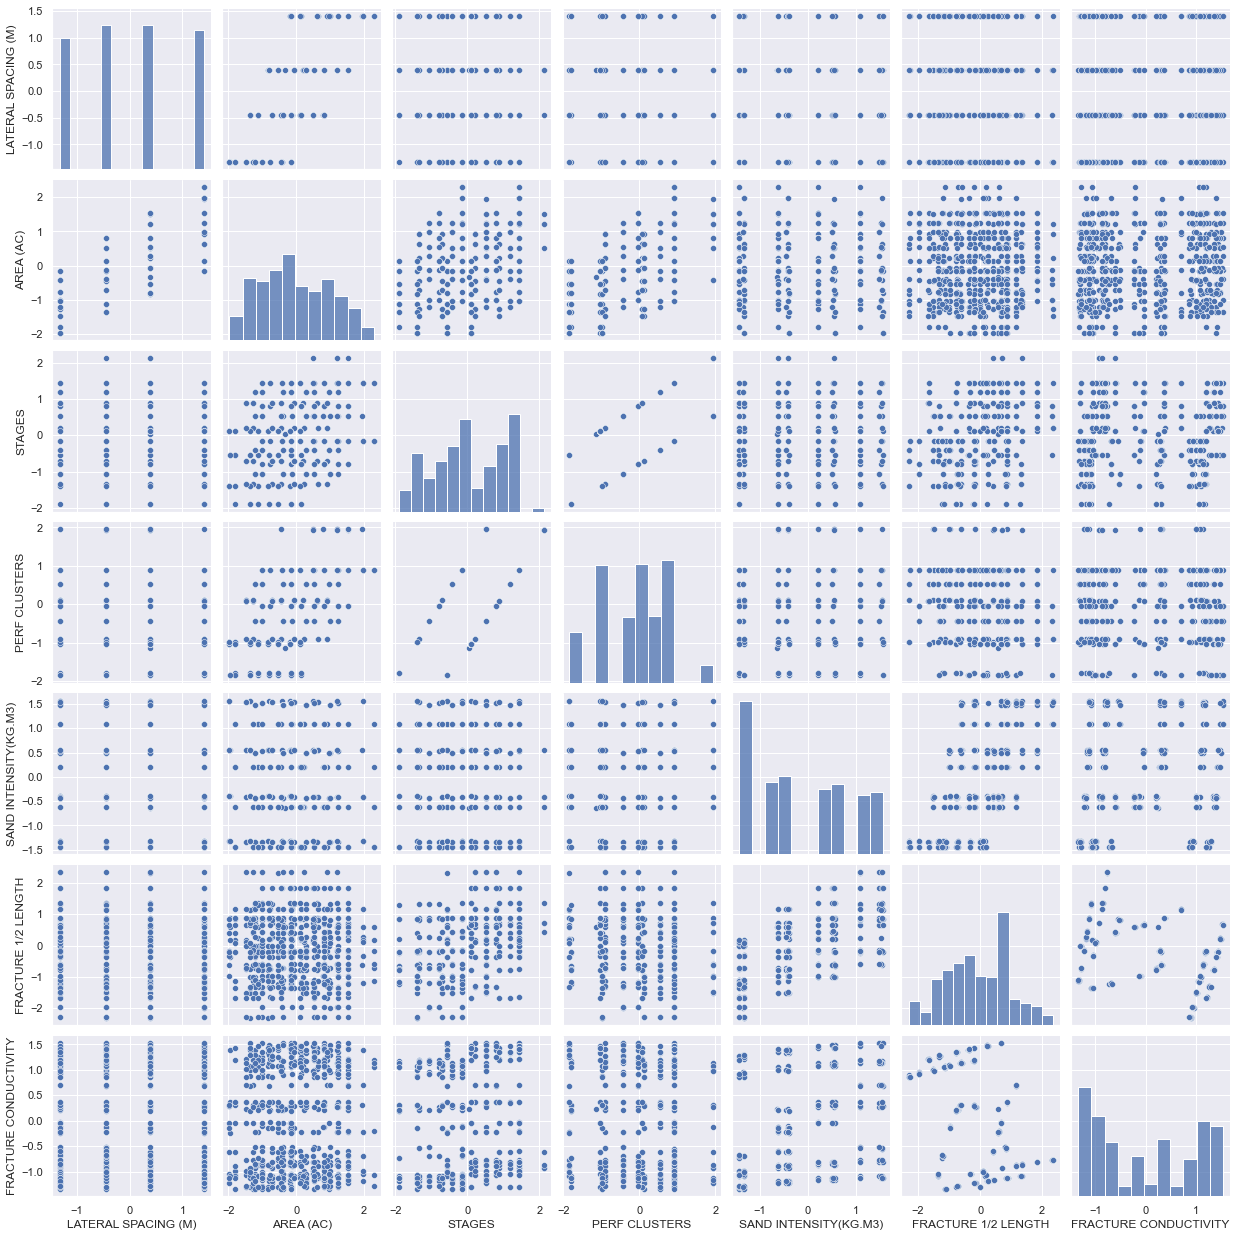

In [13]:
# Visualizing the feature dataset after applying the pre-processing strategies using cross-plot
sns.pairplot(X_r)

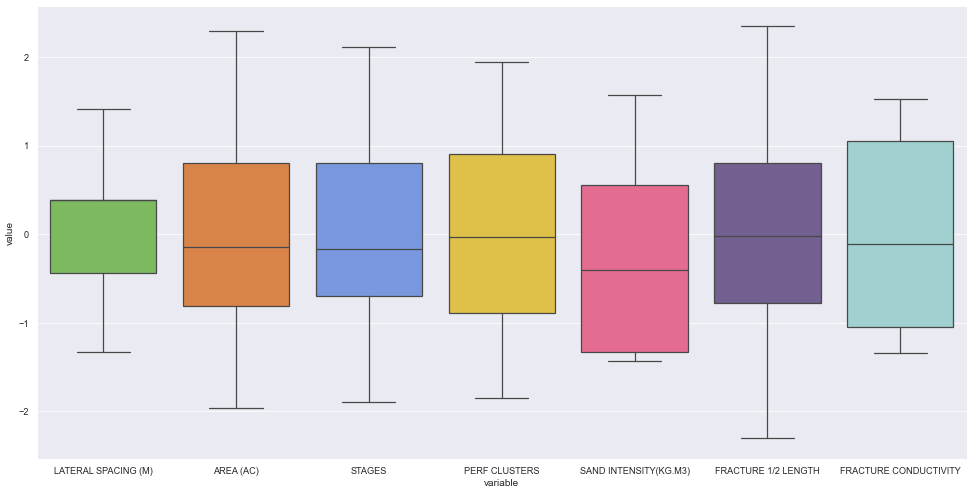

In [14]:
# Plotting the box plots for the feature dataset
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize = (20,10),dpi=60)
sns.boxplot(x="variable", y="value",data=pd.melt(X_r),palette=colors)
plt.show()

# 3. Deployment of Developed Data-Driven Models

## 3.1. Importing the Developed Data-Driven Models

In [15]:
# Importing the developed data-driven models from Notebook 1
gbr = pickle.load(open('model1.sav',"rb"))
nn = pickle.load(open('model2.sav',"rb"))
svr = pickle.load(open('model3.sav',"rb"))

In [16]:
# Desired well deliverables and econoimic metrics
targets = ['TOTAL WELL COST','IP90 GAS','GAS (EUR)','EFFECTIVE IRR','RECYCLE RATIO']

## 3.2. Deploying the Imported Regressors

In [17]:
# Deploying the developed Gradient Boosting regressor to predict the targets
y_gbr = pd.DataFrame(gbr.predict(X_r),columns=targets)
y_gbr

,TOTAL WELL COST,IP90 GAS,GAS (EUR),EFFECTIVE IRR,RECYCLE RATIO
0,16104.126214,9867.017764,10.003023,0.537749,2.692790
1,7261.992977,5856.775751,5.035598,0.700788,2.802988
2,7782.773817,5062.301580,4.444159,0.699101,2.412922
3,5484.156431,4395.650456,3.810743,0.601947,2.818939
4,13025.500844,9884.880982,8.813221,0.649378,2.834823
...,...,...,...,...,...
576,8084.064320,7962.663315,5.852715,1.228126,2.958864
577,11069.476841,9711.003416,8.710493,0.737978,3.086764
578,10427.956752,9119.785472,6.710699,0.688325,2.798093
579,10237.910303,7925.051573,4.195981,0.710992,1.990544


In [18]:
# Deploying the developed Neural Network regressor to predict the targets
y_nn = pd.DataFrame(nn.predict(X_r),columns=targets)
y_nn

,TOTAL WELL COST,IP90 GAS,GAS (EUR),EFFECTIVE IRR,RECYCLE RATIO
0,15822.847934,9849.187754,9.705697,0.514997,2.605786
1,7323.193029,5873.198646,5.113100,0.699050,2.860269
2,7709.809300,5035.389575,4.117994,0.695452,2.342209
3,5462.821249,4401.637932,3.915895,0.549947,2.843651
4,12868.737527,9917.477581,8.672885,0.673807,2.747208
...,...,...,...,...,...
576,7913.403080,7931.982253,5.500204,1.179016,2.788745
577,12190.206356,9601.242208,9.520230,0.641583,3.100608
578,10154.532406,9051.570268,6.773553,0.656237,2.750204
579,10128.715337,7900.212295,4.425544,0.693932,2.009936


In [19]:
# Deploying the developed Support Vector regressor to predict the targets
y_svr = pd.DataFrame(svr.predict(X_r),columns=targets)
y_svr

,TOTAL WELL COST,IP90 GAS,GAS (EUR),EFFECTIVE IRR,RECYCLE RATIO
0,12478.040397,9663.966868,9.669408,0.624397,2.624096
1,7159.941937,6222.557795,5.065971,0.804006,2.728509
2,8346.452108,5587.055546,4.447899,0.723367,2.429066
3,5632.191860,4273.439395,3.722832,0.511702,2.711025
4,11271.263411,9440.865496,8.850918,0.758319,2.921226
...,...,...,...,...,...
576,8615.221354,8736.225807,5.788695,1.157859,2.957286
577,10589.032656,9315.390050,9.061705,0.731661,3.051290
578,10163.778695,9002.334435,6.810275,0.692078,2.870023
579,10695.573614,7764.445180,4.246836,0.648479,1.945754


# 4. Summary

### Four important parameters that concern completion engineers are invistigated in this section to make the comparisons between their performances on well deliverables and economic metrics, these parameters are Perforation Clusters, Number of Stages, Well Spacing, and Sand Intensity (Proppant Concentration)

## 4.1. Perforation Clusters

In [20]:
# Removing the outliers from the original completion dataset
Z = df.loc[X_r.index]

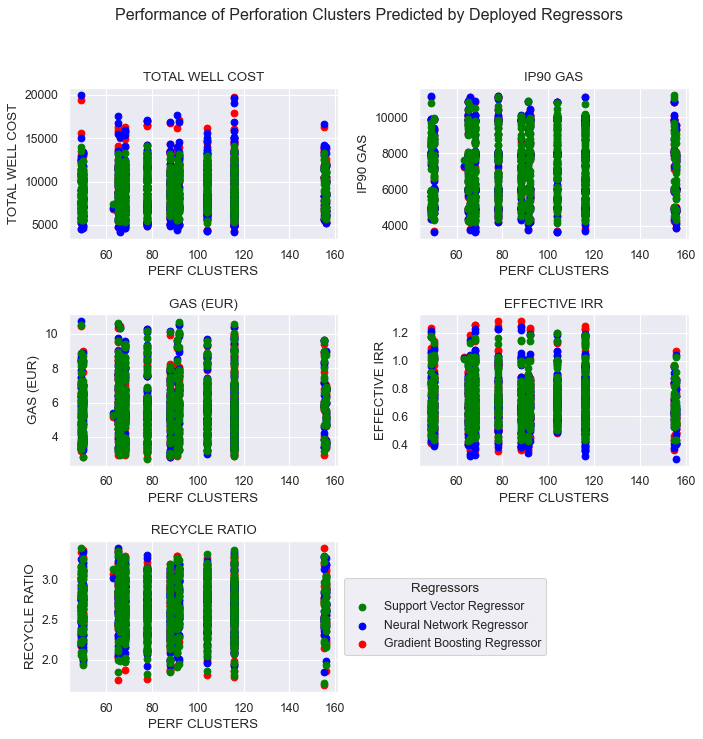

In [22]:
# Visualization of the perforation clusters performance predicted by the deployed regressors

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Performance of Perforation Clusters Predicted by Deployed Regressors')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(Z['PERF CLUSTERS'], y_gbr['TOTAL WELL COST'], c='red', label='Gradient Boosting Regressor')
axes[0,0].scatter(Z['PERF CLUSTERS'], y_nn['TOTAL WELL COST'], c='blue', label='Neural Network Regressor')
axes[0,0].scatter(Z['PERF CLUSTERS'], y_svr['TOTAL WELL COST'], c='green', label='Support Vector Regressor')
axes[0,0].set_xlabel('PERF CLUSTERS')
axes[0,0].set_ylabel('TOTAL WELL COST')

axes[0,1].scatter(Z['PERF CLUSTERS'], y_gbr['IP90 GAS'], c='red', label='Gradient Boosting Regressor')
axes[0,1].scatter(Z['PERF CLUSTERS'], y_nn['IP90 GAS'], c='blue', label='Neural Network Regressor')
axes[0,1].scatter(Z['PERF CLUSTERS'], y_svr['IP90 GAS'], c='green', label='Support Vector Regressor')
axes[0,1].set_xlabel('PERF CLUSTERS')
axes[0,1].set_ylabel('IP90 GAS')

axes[1,0].scatter(Z['PERF CLUSTERS'], y_gbr['GAS (EUR)'], c='red', label='Gradient Boosting Regressor')
axes[1,0].scatter(Z['PERF CLUSTERS'], y_nn['GAS (EUR)'], c='blue', label='Neural Network Regressor')
axes[1,0].scatter(Z['PERF CLUSTERS'], y_svr['GAS (EUR)'], c='green', label='Support Vector Regressor')
axes[1,0].set_xlabel('PERF CLUSTERS')
axes[1,0].set_ylabel('GAS (EUR)')

axes[1,1].scatter(Z['PERF CLUSTERS'], y_gbr['EFFECTIVE IRR'], c='red', label='Gradient Boosting Regressor')
axes[1,1].scatter(Z['PERF CLUSTERS'], y_nn['EFFECTIVE IRR'], c='blue', label='Neural Network Regressor')
axes[1,1].scatter(Z['PERF CLUSTERS'], y_svr['EFFECTIVE IRR'], c='green', label='Support Vector Regressor')
axes[1,1].set_xlabel('PERF CLUSTERS')
axes[1,1].set_ylabel('EFFECTIVE IRR')

axes[2,0].scatter(Z['PERF CLUSTERS'], y_gbr['RECYCLE RATIO'], c='red', label='Gradient Boosting Regressor')
axes[2,0].scatter(Z['PERF CLUSTERS'], y_nn['RECYCLE RATIO'], c='blue', label='Neural Network Regressor')
axes[2,0].scatter(Z['PERF CLUSTERS'], y_svr['RECYCLE RATIO'], c='green', label='Support Vector Regressor')
axes[2,0].set_xlabel('PERF CLUSTERS')
axes[2,0].set_ylabel('RECYCLE RATIO')

handles, labels = axes[2,0].get_legend_handles_labels()
axes[2,0].legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))

plt.show()

## 4.2. Number of Stages

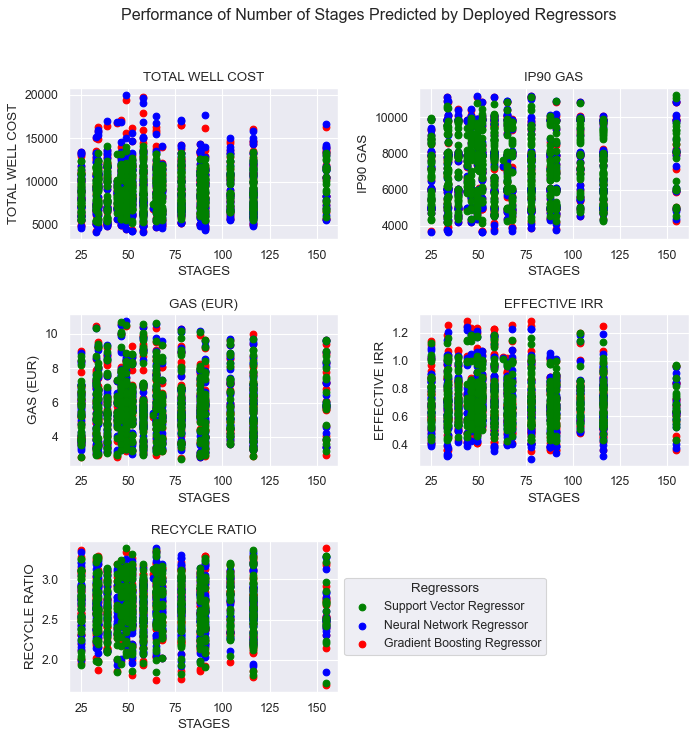

In [23]:
# Visualization of the number of stages performance predicted by the deployed regressors

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Performance of Number of Stages Predicted by Deployed Regressors')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(Z['STAGES'], y_gbr['TOTAL WELL COST'], c='red', label='Gradient Boosting Regressor')
axes[0,0].scatter(Z['STAGES'], y_nn['TOTAL WELL COST'], c='blue', label='Neural Network Regressor')
axes[0,0].scatter(Z['STAGES'], y_svr['TOTAL WELL COST'], c='green', label='Support Vector Regressor')
axes[0,0].set_xlabel('STAGES')
axes[0,0].set_ylabel('TOTAL WELL COST')

axes[0,1].scatter(Z['STAGES'], y_gbr['IP90 GAS'], c='red', label='Gradient Boosting Regressor')
axes[0,1].scatter(Z['STAGES'], y_nn['IP90 GAS'], c='blue', label='Neural Network Regressor')
axes[0,1].scatter(Z['STAGES'], y_svr['IP90 GAS'], c='green', label='Support Vector Regressor')
axes[0,1].set_xlabel('STAGES')
axes[0,1].set_ylabel('IP90 GAS')

axes[1,0].scatter(Z['STAGES'], y_gbr['GAS (EUR)'], c='red', label='Gradient Boosting Regressor')
axes[1,0].scatter(Z['STAGES'], y_nn['GAS (EUR)'], c='blue', label='Neural Network Regressor')
axes[1,0].scatter(Z['STAGES'], y_svr['GAS (EUR)'], c='green', label='Support Vector Regressor')
axes[1,0].set_xlabel('STAGES')
axes[1,0].set_ylabel('GAS (EUR)')

axes[1,1].scatter(Z['STAGES'], y_gbr['EFFECTIVE IRR'], c='red', label='Gradient Boosting Regressor')
axes[1,1].scatter(Z['STAGES'], y_nn['EFFECTIVE IRR'], c='blue', label='Neural Network Regressor')
axes[1,1].scatter(Z['STAGES'], y_svr['EFFECTIVE IRR'], c='green', label='Support Vector Regressor')
axes[1,1].set_xlabel('STAGES')
axes[1,1].set_ylabel('EFFECTIVE IRR')

axes[2,0].scatter(Z['STAGES'], y_gbr['RECYCLE RATIO'], c='red', label='Gradient Boosting Regressor')
axes[2,0].scatter(Z['STAGES'], y_nn['RECYCLE RATIO'], c='blue', label='Neural Network Regressor')
axes[2,0].scatter(Z['STAGES'], y_svr['RECYCLE RATIO'], c='green', label='Support Vector Regressor')
axes[2,0].set_xlabel('STAGES')
axes[2,0].set_ylabel('RECYCLE RATIO')

handles, labels = axes[2,0].get_legend_handles_labels()
axes[2,0].legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))

plt.show()

## 4.3. Well Spacing

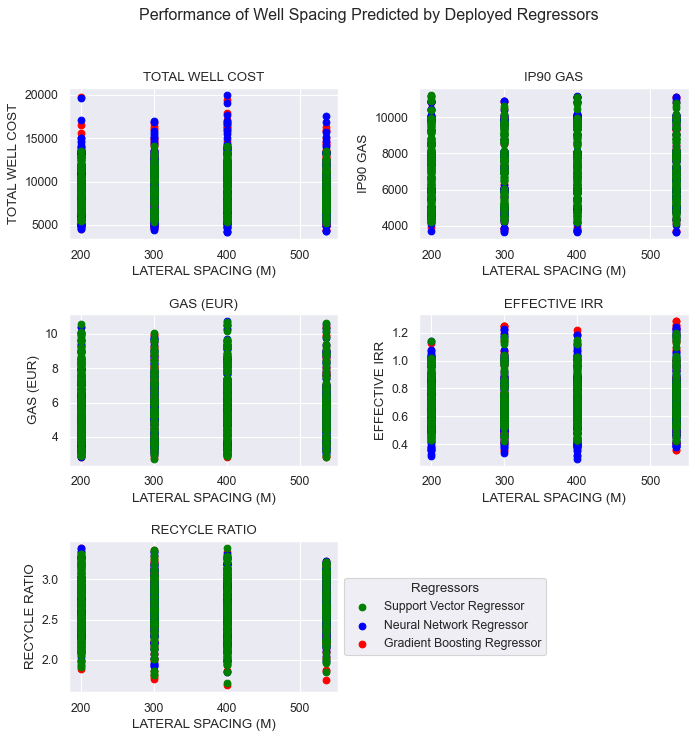

In [24]:
# Visualization of the well spacing performance predicted by the deployed regressors

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Performance of Well Spacing Predicted by Deployed Regressors')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(Z['LATERAL SPACING (M)'], y_gbr['TOTAL WELL COST'], c='red', label='Gradient Boosting Regressor')
axes[0,0].scatter(Z['LATERAL SPACING (M)'], y_nn['TOTAL WELL COST'], c='blue', label='Neural Network Regressor')
axes[0,0].scatter(Z['LATERAL SPACING (M)'], y_svr['TOTAL WELL COST'], c='green', label='Support Vector Regressor')
axes[0,0].set_xlabel('LATERAL SPACING (M)')
axes[0,0].set_ylabel('TOTAL WELL COST')

axes[0,1].scatter(Z['LATERAL SPACING (M)'], y_gbr['IP90 GAS'], c='red', label='Gradient Boosting Regressor')
axes[0,1].scatter(Z['LATERAL SPACING (M)'], y_nn['IP90 GAS'], c='blue', label='Neural Network Regressor')
axes[0,1].scatter(Z['LATERAL SPACING (M)'], y_svr['IP90 GAS'], c='green', label='Support Vector Regressor')
axes[0,1].set_xlabel('LATERAL SPACING (M)')
axes[0,1].set_ylabel('IP90 GAS')

axes[1,0].scatter(Z['LATERAL SPACING (M)'], y_gbr['GAS (EUR)'], c='red', label='Gradient Boosting Regressor')
axes[1,0].scatter(Z['LATERAL SPACING (M)'], y_nn['GAS (EUR)'], c='blue', label='Neural Network Regressor')
axes[1,0].scatter(Z['LATERAL SPACING (M)'], y_svr['GAS (EUR)'], c='green', label='Support Vector Regressor')
axes[1,0].set_xlabel('LATERAL SPACING (M)')
axes[1,0].set_ylabel('GAS (EUR)')

axes[1,1].scatter(Z['LATERAL SPACING (M)'], y_gbr['EFFECTIVE IRR'], c='red', label='Gradient Boosting Regressor')
axes[1,1].scatter(Z['LATERAL SPACING (M)'], y_nn['EFFECTIVE IRR'], c='blue', label='Neural Network Regressor')
axes[1,1].scatter(Z['LATERAL SPACING (M)'], y_svr['EFFECTIVE IRR'], c='green', label='Support Vector Regressor')
axes[1,1].set_xlabel('LATERAL SPACING (M)')
axes[1,1].set_ylabel('EFFECTIVE IRR')

axes[2,0].scatter(Z['LATERAL SPACING (M)'], y_gbr['RECYCLE RATIO'], c='red', label='Gradient Boosting Regressor')
axes[2,0].scatter(Z['LATERAL SPACING (M)'], y_nn['RECYCLE RATIO'], c='blue', label='Neural Network Regressor')
axes[2,0].scatter(Z['LATERAL SPACING (M)'], y_svr['RECYCLE RATIO'], c='green', label='Support Vector Regressor')
axes[2,0].set_xlabel('LATERAL SPACING (M)')
axes[2,0].set_ylabel('RECYCLE RATIO')

handles, labels = axes[2,0].get_legend_handles_labels()
axes[2,0].legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))

plt.show()

## 4.4. Sand Intensity

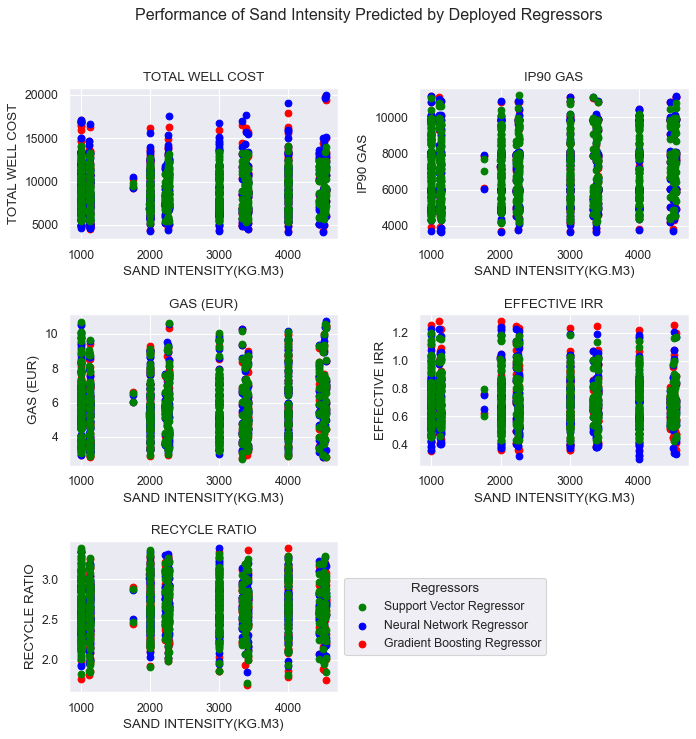

In [25]:
# Visualization of the sand intensity performance predicted by the deployed regressors

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Performance of Sand Intensity Predicted by Deployed Regressors')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_gbr['TOTAL WELL COST'], c='red', label='Gradient Boosting Regressor')
axes[0,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_nn['TOTAL WELL COST'], c='blue', label='Neural Network Regressor')
axes[0,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_svr['TOTAL WELL COST'], c='green', label='Support Vector Regressor')
axes[0,0].set_xlabel('SAND INTENSITY(KG.M3)')
axes[0,0].set_ylabel('TOTAL WELL COST')

axes[0,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_gbr['IP90 GAS'], c='red', label='Gradient Boosting Regressor')
axes[0,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_nn['IP90 GAS'], c='blue', label='Neural Network Regressor')
axes[0,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_svr['IP90 GAS'], c='green', label='Support Vector Regressor')
axes[0,1].set_xlabel('SAND INTENSITY(KG.M3)')
axes[0,1].set_ylabel('IP90 GAS')

axes[1,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_gbr['GAS (EUR)'], c='red', label='Gradient Boosting Regressor')
axes[1,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_nn['GAS (EUR)'], c='blue', label='Neural Network Regressor')
axes[1,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_svr['GAS (EUR)'], c='green', label='Support Vector Regressor')
axes[1,0].set_xlabel('SAND INTENSITY(KG.M3)')
axes[1,0].set_ylabel('GAS (EUR)')

axes[1,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_gbr['EFFECTIVE IRR'], c='red', label='Gradient Boosting Regressor')
axes[1,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_nn['EFFECTIVE IRR'], c='blue', label='Neural Network Regressor')
axes[1,1].scatter(Z['SAND INTENSITY(KG.M3)'], y_svr['EFFECTIVE IRR'], c='green', label='Support Vector Regressor')
axes[1,1].set_xlabel('SAND INTENSITY(KG.M3)')
axes[1,1].set_ylabel('EFFECTIVE IRR')

axes[2,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_gbr['RECYCLE RATIO'], c='red', label='Gradient Boosting Regressor')
axes[2,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_nn['RECYCLE RATIO'], c='blue', label='Neural Network Regressor')
axes[2,0].scatter(Z['SAND INTENSITY(KG.M3)'], y_svr['RECYCLE RATIO'], c='green', label='Support Vector Regressor')
axes[2,0].set_xlabel('SAND INTENSITY(KG.M3)')
axes[2,0].set_ylabel('RECYCLE RATIO')

handles, labels = axes[2,0].get_legend_handles_labels()
axes[2,0].legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))

plt.show()

## 4.5. Conclusion

### 1. From the plots above, it can be observed that all regressors agree on the same predictions of well deliverables and economic metrics, except for the support vector regressor where it underestimates the total well cost compared to gradient boosting and neural network regressors, and that is due to the low memorization and generalization R2 scores during the training and testing stages in Notebook 1. However, due to the absence of well deliverables and economic metrics in the current dataset, it is hard to substantiate whether any of the regressors made the right predictions, and so we cannot rule out SVR predictions just because it disagrees with the other two regressors in predicting total well cost.
### 2. It is difficult to establish general trends and relationships between well deliverables and completion parameters from the given number of wells (500 - 600), we need more data on more wells to be able to make decisions based on data-driven models predictions.